In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense

In [87]:
columns = ['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'speed', 'angle']
data = pd.read_csv('final_final.csv', names=columns)
data.head()

,d1,d2,d3,d4,d5,d6,d7,d8,d9,speed,angle
0,0.333,0.368,0.470,0.749,2.058,0.771,0.477,0.374,0.342,0.04,0.0
1,0.333,0.368,0.470,0.749,2.043,0.780,0.476,0.374,0.342,0.04,0.0
2,0.333,0.367,0.470,0.761,2.042,0.782,0.476,0.374,0.342,0.04,0.0
3,0.333,0.367,0.469,0.755,2.032,0.779,0.477,0.374,0.342,0.04,0.0
4,0.332,0.366,0.468,0.754,2.032,0.788,0.479,0.375,0.342,0.04,0.0


<BarContainer object of 21 artists>

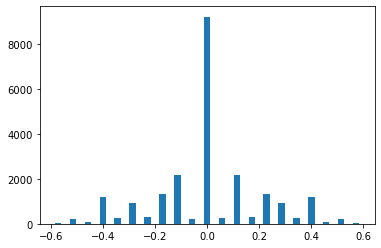

In [88]:
num_bins = 21
hist, bins = np.histogram(data['angle'], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width=0.025)

total data 22609
removed 6712
remaining 15897


<BarContainer object of 21 artists>

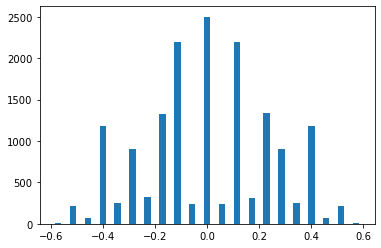

In [89]:
print("total data",  len(data))
remove_list = []
for j in range(num_bins):
    list_ = []
    for i in range(len(data['angle'])):
        if data['angle'][i] >= bins[j] and data['angle'][i] <= bins[j+1]:
            list_.append(i)
    list_ = shuffle(list_)
    list_ = list_[2500:]
    remove_list.extend(list_)
    
print('removed', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining', len(data))
hist, _  = np.histogram(data['angle'], (num_bins))
plt.bar(center, hist, width=0.025)

In [90]:
laser = data[['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9']]
steering = data['angle']
laser

,d1,d2,d3,d4,d5,d6,d7,d8,d9
1,0.333,0.368,0.470,0.749,2.043,0.780,0.476,0.374,0.342
2,0.333,0.367,0.470,0.761,2.042,0.782,0.476,0.374,0.342
7,0.331,0.365,0.466,0.748,2.007,0.792,0.479,0.375,0.342
13,0.330,0.362,0.463,0.748,1.979,0.788,0.481,0.376,0.343
16,0.329,0.361,0.462,0.742,1.966,0.796,0.482,0.376,0.343
...,...,...,...,...,...,...,...,...,...
22585,0.342,0.375,0.477,0.783,1.708,0.778,0.476,0.362,0.323
22590,0.343,0.376,0.483,0.974,1.551,0.778,0.476,0.362,0.324
22591,0.344,0.376,0.486,1.066,1.514,0.774,0.474,0.362,0.324
22596,0.345,0.380,0.487,1.272,1.392,0.798,0.481,0.365,0.324


In [91]:
X_train, X_valid, y_train, y_valid = train_test_split(laser, steering, test_size=0.25, random_state=4)

Text(0.5, 1.0, 'Validation set')

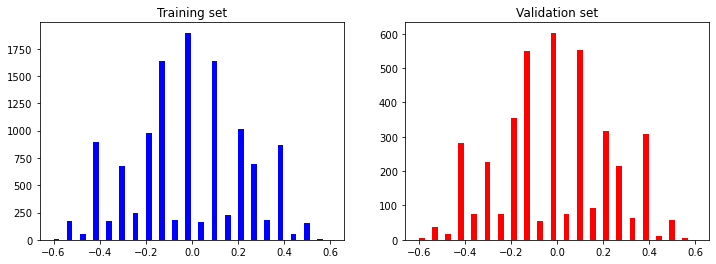

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.025, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.025, color='red')
axes[1].set_title('Validation set')

In [93]:
def my_model():
    model = Sequential()
    model.add(Dense(units = 9, activation = 'elu', input_shape=(9,)))
#     model.add(Dense(units = 5, activation = 'elu'))
#     model.add(Dense(units = 2, activation = 'relu'))
    model.add(Dense(units=1))
    optimizer = Adam(lr=1e-3)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [94]:
model = my_model()
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 10        
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________
None


In [95]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), batch_size=100, verbose=1, shuffle=1)

Epoch 1/100
120/120 [==============================] - 0s 1ms/step - loss: 0.1659 - val_loss: 0.0427
Epoch 2/100
120/120 [==============================] - 0s 813us/step - loss: 0.0355 - val_loss: 0.0257
Epoch 3/100
120/120 [==============================] - 0s 803us/step - loss: 0.0246 - val_loss: 0.0211
Epoch 4/100
120/120 [==============================] - 0s 950us/step - loss: 0.0205 - val_loss: 0.0190
Epoch 5/100
120/120 [==============================] - 0s 806us/step - loss: 0.0187 - val_loss: 0.0181
Epoch 6/100
120/120 [==============================] - 0s 800us/step - loss: 0.0178 - val_loss: 0.0177
Epoch 7/100
120/120 [==============================] - 0s 813us/step - loss: 0.0175 - val_loss: 0.0174
Epoch 8/100
120/120 [==============================] - 0s 811us/step - loss: 0.0173 - val_loss: 0.0173
Epoch 9/100
120/120 [==============================] - 0s 796us/step - loss: 0.0176 - val_loss: 0.0172
Epoch 10/100
120/120 [==============================] - 0s 812us/step - los

Epoch 80/100
120/120 [==============================] - 0s 856us/step - loss: 0.0151 - val_loss: 0.0146
Epoch 81/100
120/120 [==============================] - 0s 850us/step - loss: 0.0147 - val_loss: 0.0148
Epoch 82/100
120/120 [==============================] - 0s 852us/step - loss: 0.0147 - val_loss: 0.0146
Epoch 83/100
120/120 [==============================] - 0s 830us/step - loss: 0.0146 - val_loss: 0.0146
Epoch 84/100
120/120 [==============================] - 0s 825us/step - loss: 0.0148 - val_loss: 0.0145
Epoch 85/100
120/120 [==============================] - 0s 840us/step - loss: 0.0148 - val_loss: 0.0145
Epoch 86/100
120/120 [==============================] - 0s 820us/step - loss: 0.0146 - val_loss: 0.0145
Epoch 87/100
120/120 [==============================] - 0s 830us/step - loss: 0.0146 - val_loss: 0.0145
Epoch 88/100
120/120 [==============================] - 0s 821us/step - loss: 0.0147 - val_loss: 0.0145
Epoch 89/100
120/120 [==============================] - 0s 828us

Text(0.5, 0, 'Epoch')

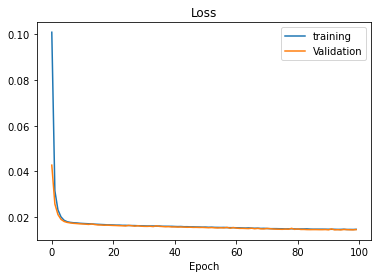

In [96]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'Validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [97]:
model.save('model.h5')